In [2]:
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib inline
#global plt



In [3]:
#Definicion de funciones

#funcion gamma (se usa el hecho que solo se utilizara para valores enteros)
def gamma(x):
    return np.math.factorial(x)

#la inversa de la funcion de distribucion acumulada F
def invCumDist(x):
    return 1/(1-x)

#la distribucion acumulada F
def cumDist(x):
    if x<=1:
        return 0
    else:

        return 1-1/x

# la distribucion beta (es la distribucion de las X_i:n con X_i distribuidas uniforme)
def f(x,a,b):
    return (gamma(a+b)/(gamma(a)*gamma(b))) * (x**(a-1)) * ((1-x)**(b-1))

# la distribucion beta compuesta con F (es la distribucion de las X_i:n con X_i distribuidas como F) 
def f2(x,a,b):
    #return f(cumDist(x),a,b)
    if x<=1:
        return 0
    else:
        return (gamma(a+b)/(gamma(a)*gamma(b))) * ((1-1/x)**(a-1)) * ((1/x)**(b+1))

x = np.linspace(0, 1, 100)


In [4]:
#Se realizan las simulaciones para las X uniformes (punto 4)1.)

#n=9000
n=50

dist = {1:{},2:{},3:{},4:{},5:{},6:{}}
for i in range(n):
    sample = []
    for j in range(6):
        sample.append(round(np.random.uniform(),1))
    sample.sort()
    for j in range(6):
        if sample[j] in dist[j+1]:
            dist[j+1][sample[j]] = dist[j+1][sample[j]] + 1
        else:
            dist[j+1][sample[j]] = 1

for i in range(6):
    for value in dist[i+1].keys():
        dist[i+1][value] = dist[i+1][value]/n



<Figure size 900x600 with 0 Axes>

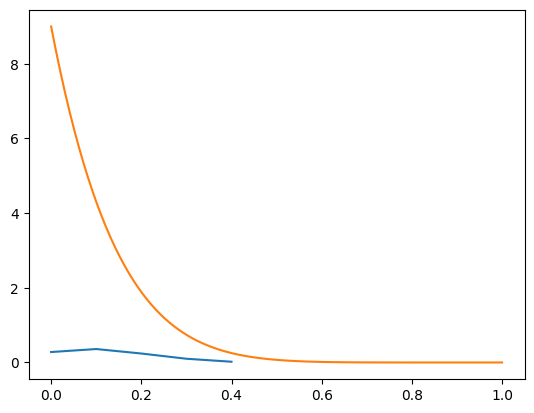

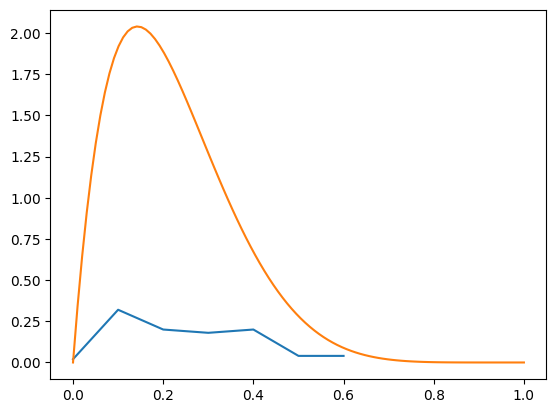

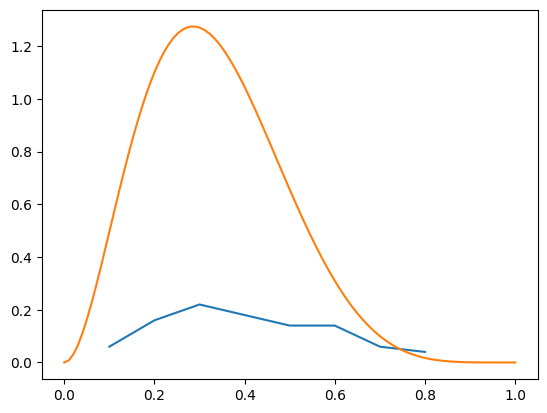

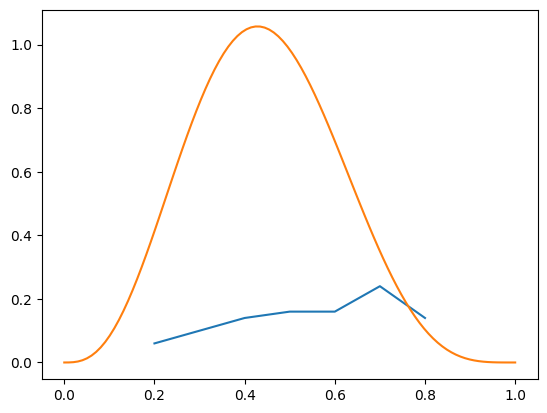

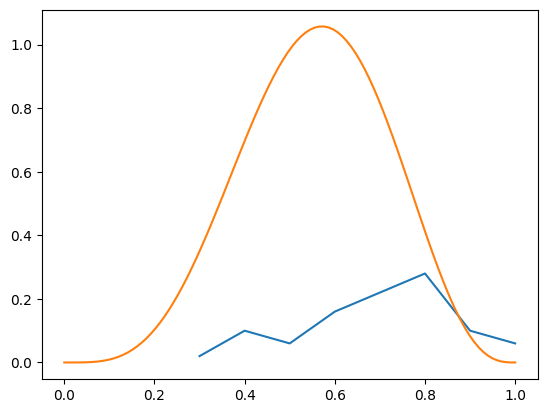

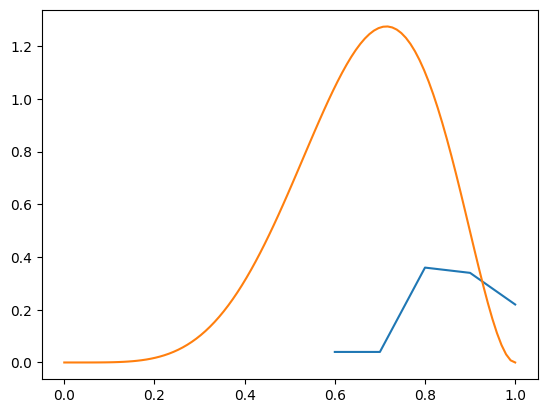

In [5]:
#Se muestran las graficas para el punto 4)1.

#%matplotlib inline
plt.figure(figsize=(9, 6))
#fig, ax = plt.subplots()

for i in range(6):
    fig, ax = plt.subplots()
    xs, ys = zip(*sorted(zip(dist[i+1].keys(), dist[i+1].values())))

    plt.plot(xs, ys)
#   graficar  BETA(i, n − i + 1).
    plt.plot(x, f(x,i+1,6-i+1+1))


plt.show()
#plt.savefig("g")


In [18]:
#Se realizan las simulaciones para las X uniformes (punto 4)1.)

#n=9000
n=50

dist2 = {1:{},2:{},3:{},4:{},5:{},6:{}}
for i in range(n):
    sample = []
    for j in range(6):
        var = invCumDist(round(np.random.uniform(),1)-0.01)
        sample.append(var)
    sample.sort()
    for j in range(6):
        if sample[j] in dist2[j+1]:
            dist2[j+1][sample[j]] = dist2[j+1][sample[j]] + 1
        else:
            dist2[j+1][sample[j]] = 1

for i in range(6):
    for value in dist2[i+1].keys():
        dist2[i+1][value] = dist2[i+1][value]/n


<Figure size 900x600 with 0 Axes>

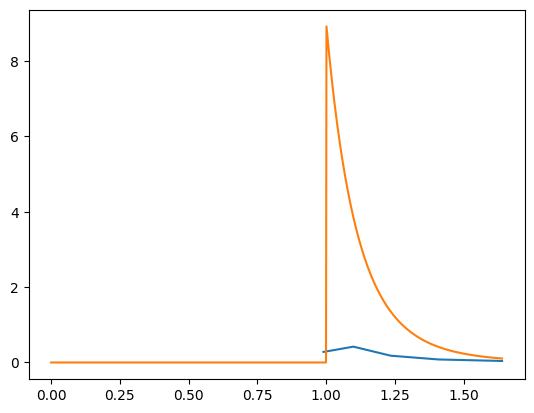

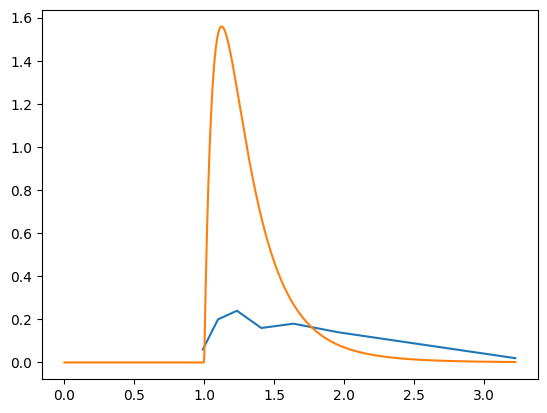

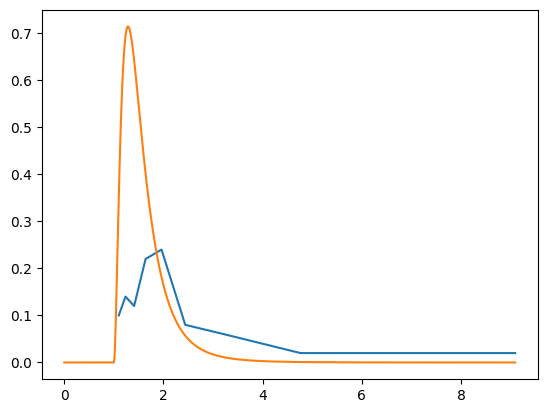

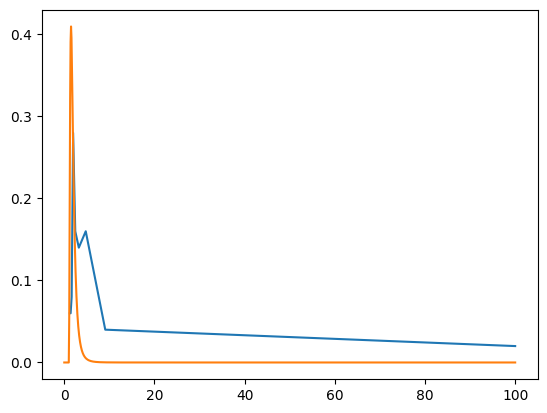

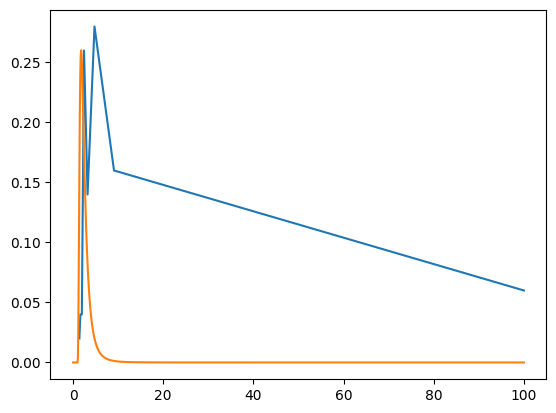

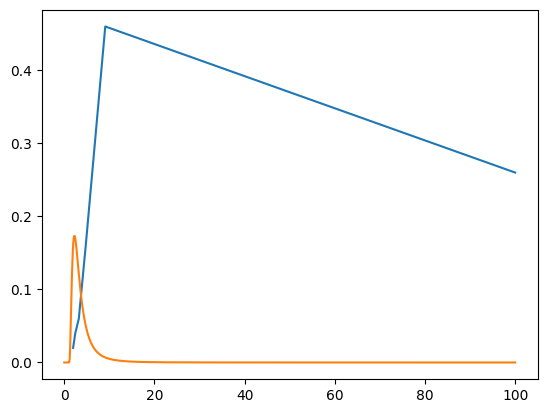

In [19]:
#Se muestran las graficas para el punto 4)2.

#%matplotlib inline
plt.figure(figsize=(9, 6))
#fig, ax = plt.subplots()

for i in range(6):
    fig, ax = plt.subplots()
    xs, ys = zip(*sorted(zip(dist2[i+1].keys(), dist2[i+1].values())))
    plt.plot(xs, ys)

    x2 = np.linspace(0, max(xs), 1000)
    y=[]
    for point in x2:
        y.append(f2(point,i+1,6-i+1+1))
        
    plt.plot(x2, y)


#plt.show()
#plt.savefig("g")

In [20]:
#Ahora se calculan los errores de los sampleos de distribucion uniforme.

print("Error uniforme para sampleo de estadisticos de distribucion uniforme:")

for i in range(6):
    errores = []
    for x in dist[i+1].keys():
        errores.append(abs(dist[i+1][x]-f(x,i+1,6-i+1)))
    print("El error para el estadistico {}:6 es {}".format(i+1,max(errores)))

Error uniforme para sampleo de estadisticos de distribucion uniforme:
El error para el estadistico 1:6 es 7.72
El error para el estadistico 2:6 es 1.6350080000000007
El error para el estadistico 3:6 es 0.9901039999999999
El error para el estadistico 4:6 es 0.93375
El error para el estadistico 5:6 es 1.0012160000000003
El error para el estadistico 6:6 es 1.4750080000000003


In [21]:
#Ahora se calculan los errores de los sampleos de distribucion F.

print("Error uniforme para sampleo de estadisticos de distribucion F:")

for i in range(6):
    errores = []
    for x in dist2[i+1].keys():
        errores.append(abs(dist2[i+1][x]-f2(x,i+1,6-i+1)))
    print("El error para el estadistico {}:6 es {}".format(i+1,max(errores)))

Error uniforme para sampleo de estadisticos de distribucion F:
El error para el estadistico 1:6 es 3.3420202209212215
El error para el estadistico 2:6 es 1.1022377687804206
El error para el estadistico 3:6 es 0.48330109715434144
El error para el estadistico 4:6 es 0.27070425585313296
El error para el estadistico 5:6 es 0.23757971606341843
El error para el estadistico 6:6 es 0.43918932724546683
